In [17]:
pip install pandas numpy matplotlib statsmodels yfinance

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler

In [3]:
# Fetch data for Soybean Futures and Corn Futures (CBOT Futures)
soybean_ticker = "ZS=F"  # Soybean Futures (CBOT)
corn_ticker = "ZC=F"  # Corn Futures (CBOT)

# Fetch 10 years of data (you can adjust the duration if needed)
start_date = '2015-01-01'
end_date = '2025-01-01'

soybean_data = yf.download(soybean_ticker, start=start_date, end=end_date)['Close']
corn_data = yf.download(corn_ticker, start=start_date, end=end_date)['Close']

print(soybean_data)
print(corn_data)
print(soybean_data['ZS=F'].info())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Ticker         ZS=F
Date               
2015-01-02  1002.50
2015-01-05  1039.75
2015-01-06  1051.00
2015-01-07  1052.75
2015-01-08  1045.00
...             ...
2024-12-24   975.25
2024-12-26   988.00
2024-12-27   980.00
2024-12-30   982.00
2024-12-31   998.25

[2514 rows x 1 columns]
Ticker        ZC=F
Date              
2015-01-02  395.75
2015-01-05  406.00
2015-01-06  405.00
2015-01-07  396.25
2015-01-08  394.25
...            ...
2024-12-24  448.50
2024-12-26  453.75
2024-12-27  454.00
2024-12-30  452.25
2024-12-31  458.50

[2512 rows x 1 columns]
<class 'pandas.core.series.Series'>
DatetimeIndex: 2514 entries, 2015-01-02 to 2024-12-31
Series name: ZS=F
Non-Null Count  Dtype  
--------------  -----  
2514 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB
None


In [4]:
# Run ADF test on Soybean Futures data
soybean_adf = adfuller(soybean_data)
corn_adf = adfuller(corn_data)

# Display the results of the ADF test
print("Soybean ADF Test Results:")
print(f"ADF Statistic: {soybean_adf[0]}")
print(f"p-value: {soybean_adf[1]}")
print(f"Critical Values: {soybean_adf[4]}")

print("\nCorn ADF Test Results:")
print(f"ADF Statistic: {corn_adf[0]}")
print(f"p-value: {corn_adf[1]}")
print(f"Critical Values: {corn_adf[4]}")

# Interpret results
if soybean_adf[1] < 0.05:
    print("\nSoybean Futures data is stationary.")
else:
    print("\nSoybean Futures data is non-stationary.")

if corn_adf[1] < 0.05:
    print("\nCorn Futures data is stationary.")
else:
    print("\nCorn Futures data is non-stationary.")


Soybean ADF Test Results:
ADF Statistic: -1.4133711235231745
p-value: 0.5758493127379735
Critical Values: {'1%': np.float64(-3.432960050084045), '5%': np.float64(-2.8626931078801285), '10%': np.float64(-2.567383843706519)}

Corn ADF Test Results:
ADF Statistic: -1.6249896469625142
p-value: 0.4701144018838258
Critical Values: {'1%': np.float64(-3.4329842325121738), '5%': np.float64(-2.862703786843828), '10%': np.float64(-2.567389529328891)}

Soybean Futures data is non-stationary.

Corn Futures data is non-stationary.


            Soybean    Corn
Date                       
2015-01-02  1002.50  395.75
2015-01-05  1039.75  406.00
2015-01-06  1051.00  405.00
2015-01-07  1052.75  396.25
2015-01-08  1045.00  394.25
...             ...     ...
2024-12-24   975.25  448.50
2024-12-26   988.00  453.75
2024-12-27   980.00  454.00
2024-12-30   982.00  452.25
2024-12-31   998.25  458.50

[2512 rows x 2 columns]
             Soybean      Corn
Date                          
2015-01-02 -0.449770 -0.419991
2015-01-05 -0.297332 -0.336368
2015-01-06 -0.251294 -0.344526
2015-01-07 -0.244132 -0.415912
2015-01-08 -0.275848 -0.432229
...              ...       ...
2024-12-24 -0.561285  0.010364
2024-12-26 -0.509108  0.053195
2024-12-27 -0.541847  0.055235
2024-12-30 -0.533662  0.040958
2024-12-31 -0.467162  0.091948

[2512 rows x 2 columns]


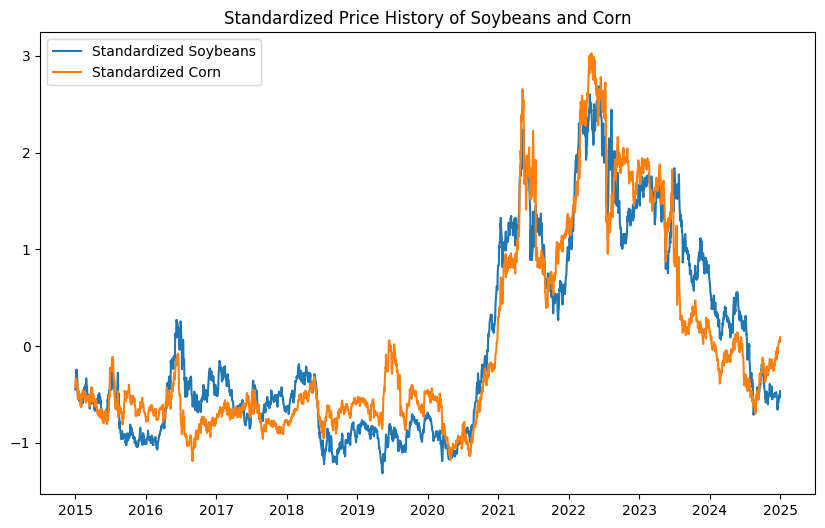

In [12]:
# Standardizing the data (z-score normalization)
scaler = StandardScaler()
data = pd.DataFrame({'Soybean': soybean_data['ZS=F'], 'Corn': corn_data['ZC=F']})
data = data.dropna()
print(data)


# Standardize both soybean and red bean data
data_standardized = pd.DataFrame(scaler.fit_transform(data), columns=['Soybean', 'Corn'], index=data.index)
print(data_standardized)

# Plot the standardized data to visualize
plt.figure(figsize=(10, 6))
plt.plot(data_standardized['Soybean'], label="Standardized Soybeans")
plt.plot(data_standardized['Corn'], label="Standardized Corn")
plt.legend()
plt.title("Standardized Price History of Soybeans and Corn")
plt.show()

In [13]:
# Check co-integration between Soybeans and Corn using Engle-Granger Test
score, p_value, _ = coint(data_standardized['Soybean'], data_standardized['Corn'])

print(f"Cointegration Test Score: {score}")
print(f"P-value: {p_value}")

# Interpret p-value to conclude whether co-integration exists
if p_value < 0.05:
    print("The two series are co-integrated at the 5% significance level.")
else:
    print("The two series are not co-integrated.")

Cointegration Test Score: -3.230732757621967
P-value: 0.06493687534506827
The two series are not co-integrated.


                            OLS Regression Results                            
Dep. Variable:                Soybean   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 1.659e+04
Date:                Sun, 16 Feb 2025   Prob (F-statistic):               0.00
Time:                        11:32:48   Log-Likelihood:                -1015.6
No. Observations:                2512   AIC:                             2035.
Df Residuals:                    2510   BIC:                             2047.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.469e-16      0.007   4.79e-14      1.0

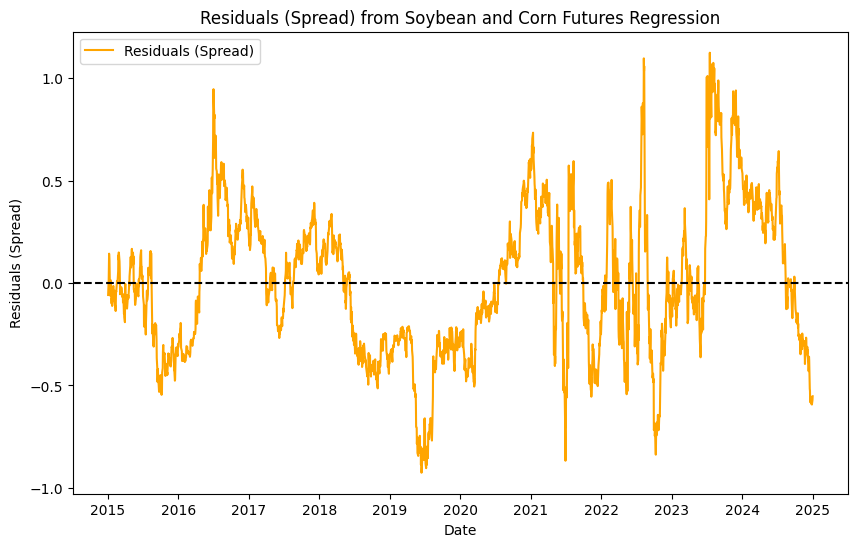

The residuals are stationary, indicating co-integration.


In [14]:
# Run OLS regression to find the hedge ratio (beta)
X = sm.add_constant(data_standardized['Corn'])  # Add constant to the model
y = data_standardized['Soybean']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display regression results
print(model.summary())

# Extract residuals (spread)
residuals = model.resid

# Perform ADF test on the residuals to check for stationarity
adf_test = adfuller(residuals)
print(f"ADF Statistic (Residuals): {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# Visualize the residuals (spread)
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals (Spread)", color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals (Spread) from Soybean and Corn Futures Regression")
plt.xlabel("Date")
plt.ylabel("Residuals (Spread)")
plt.legend()
plt.show()

# Interpret ADF test result for residuals
if adf_test[1] < 0.05:
    print("The residuals are stationary, indicating co-integration.")
else:
    print("The residuals are non-stationary, suggesting no co-integration.")